In [1]:
import pandas as pd

data = pd.read_csv('CS170_large_Data__22.txt', sep="  ", header=None)
print(data)

       0         1         2         3         4         5         6   \
0     2.0 -1.570255 -1.666031 -0.654158  0.393063 -1.015074 -0.833143   
1     2.0 -0.208771 -0.418341 -0.399927 -0.097224 -1.443924 -0.033639   
2     2.0 -0.341595  0.900958  1.063028  1.767279 -0.259470 -0.316076   
3     2.0 -0.600950  0.631629  0.058847  0.931075  2.361298 -2.031658   
4     2.0  1.950263 -0.148117  0.152742 -1.058149 -0.328331 -1.107986   
...   ...       ...       ...       ...       ...       ...       ...   
1995  2.0 -0.705182  0.084779 -0.768742 -0.280267 -0.876943 -0.326194   
1996  2.0  0.288899  0.635208 -0.276058 -0.018091 -0.929410 -0.974984   
1997  1.0  0.764352 -0.379353  0.624629  0.130067 -1.084427  0.797201   
1998  2.0  0.804326 -1.350401 -0.318680  1.876447 -0.236127  1.848353   
1999  2.0 -0.501073 -1.724255  0.095062  0.066161  0.860807  0.914780   

            7         8         9   ...        11        12        13  \
0    -1.247872 -0.817582  1.246537  ...  0.676765 

C:\Users\huntm\anaconda3\envs\alt\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [2]:
#Feature Analysis Script, set data = (selected dataframe).

import numpy as np
import time

#data = #input dataframe here#
data = np.array(data)

def forward_cross_validation(data, current_set, j):
    curr = [0]
    curr.extend(current_set)
    curr.append(j)
    
    temp = data[:, curr].copy()
    label = temp[:, 0]
    label = np.squeeze(label)
    correct = 0
    row = temp[:, range(1, temp.shape[1])]
        
    for i in range(len(temp)):
        #print('on the', i, 'th level of the search tree')
        lab = label[i]
        dat = row[i,:]
        #print("looping over i at the", i, "location")
        #print("The", i, "th label is in class", lab)
        dist = 99999999
        location = 99999999
        for j in range(len(temp)):
            if j == i:
                continue
            #print("ask if", i, "is nearest neighbor with", j)

            distance = np.sqrt(np.sum((dat - row[j,:])**2))
            #distance = np.sqrt(np.sum(np.square(np.subtract(dat, row[j,:]))))
            if (distance < dist):
                dist = distance
                location = j
                nnl = label[j]

        #print("object", i, "is class", lab)
        #print("its nearest neighbor is", location, "which is in class", nnl)
        if (lab == nnl):
            correct = correct + 1
            
    #print(correct)
    accuracy = 100 * correct / len(data)
    curr.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(curr, accuracy))
    return accuracy

def backward_cross_validation(data, current_set, j):
    curr = [0]
    curr.extend(current_set)
    curr.remove(j)
    
    temp = data[:, curr].copy()
    label = temp[:, 0]
    label = np.squeeze(label)
    correct = 0
    row = temp[:, range(1, temp.shape[1])]
        
    for i in range(len(temp)):
        #print('on the', i, 'th level of the search tree')
        lab = label[i]
        dat = row[i,:]
        #print("looping over i at the", i, "location")
        #print("The", i, "th label is in class", lab)
        dist = 99999999
        location = 99999999
        for j in range(len(temp)):
            if j == i:
                continue
            #print("ask if", i, "is nearest neighbor with", j)

            distance = np.sqrt(np.sum((dat - row[j,:])**2))
            if (distance < dist):
                dist = distance
                location = j
                nnl = label[j]

        #print("object", i, "is class", lab)
        #print("its nearest neighbor is", location, "which is in class", nnl)
        if (lab == nnl):
            correct = correct + 1
            
    #print(correct)
    accuracy = 100 * correct / len(data)
    curr.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(curr, accuracy))

    return accuracy

def forwards(data):
    kf = [x for x in range(1, data.shape[1]-1)]
    accuracy = forward_cross_validation(data, kf, data.shape[1]-1)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("Beginning Search.")
    
    results = []
    current_set = []
    acu = 0
    res = 0
     #2 label ver
    #if len(data[data[:,0] == 1]) > len(data[data[:,0] == 2]):
    #    acc = len(data[data[:,0] == 1]) / len(data)
    #else:
    #    acc = len(data[data[:,0] == 2]) / len(data)
    #results.append(([], acc))
    #3 label ver
    if len(data[data[:,0] == 0]) > len(data[data[:,0] == 1]):
        if len(data[data[:,0] == 0]) > len(data[data[:,0] == 2]):
            acc = len(data[data[:,0] == 0]) / len(data)
        else:
            acc = len(data[data[:,0] == 2]) / len(data)
    else:
        if len(data[data[:,0] == 1]) > len(data[data[:,0] == 2]):
            acc = len(data[data[:,0] == 1]) / len(data)
        else:
            acc = len(data[data[:,0] == 2]) / len(data)
    results.append(([], acc))        

    for i in range(1, data.shape[1]):
    #print('on the', i, 'th level of the search tree')
        feature_to_add = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j in current_set:
                continue
            #print('--considering adding the', j, 'feature')
            accuracy = forward_cross_validation(data, current_set, j)
        
            if (accuracy > best):
                best = accuracy
                feature_to_add = j
            
        #print('on level', i, 'i added feature', feature_to_add, 'to current set')
        current_set.append(feature_to_add)
        if len(results) != 0 and results[-1][1] > best:
            print("(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("Feature set {} was best, accuracy is {}%".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > acu:
            res = pair
            acu = best
        
    return res


def backwards(data):
    kf = [x for x in range(1, data.shape[1]-1)]
    accuracy = forward_cross_validation(data, kf, data.shape[1]-1)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("Beginning Search.")
    
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    curr = current_set.pop()
    acc = forward_cross_validation(data, current_set, curr)
    current_set.append(curr)
    results.append(([y + 1 for y in range(data.shape[1]-1)], acc))
    acu = 0
    res = 0
    for i in reversed(range(1, data.shape[1])):
        #print('on the', i, 'th level of the search tree')
        feature_to_sub = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j not in current_set:
                #print("hit")
                continue
            #print('--considering adding the', j, 'feature')
            accuracy = backward_cross_validation(data, current_set, j)

            if (accuracy > best):
                best = accuracy
                feature_to_sub = j

        #print('on level', i, 'i sub feature', feature_to_sub, 'from current set')
        current_set.remove(feature_to_sub)
        if len(results) != 0 and results[-1][1] > best:
            print("(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("Feature set {} was best, accuracy is {}%".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > acu:
            res = pair
            acu = best
    
    return res, results

st = time.time()
res, results = backwards(data)
#res, results = forwards(data)
print("Finished search!! The best feature subset is {}, which has an accuracy of {}%".format(res[0], res[1]))
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.05%
Running nearest neighbor with all 21 features, using leaving-one-out evaluation, I get an accuracy of 71.05%
Beginning Search.
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.05%
Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 70.7%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.1%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.9%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.2%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.4%
Using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 67.95%
Using feature(s) [1, 2, 3, 4, 5,

Using feature(s) [1, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20] accuracy is 73.25%
Using feature(s) [1, 3, 4, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20] accuracy is 73.8%
Using feature(s) [1, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20] accuracy is 70.7%
Using feature(s) [1, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20] accuracy is 72.6%
Using feature(s) [1, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 19, 20] accuracy is 73.1%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 19, 20] accuracy is 72.15%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 19, 20] accuracy is 73.0%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 17, 19, 20] accuracy is 73.5%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19, 20] accuracy is 74.1%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 19, 20] accuracy is 74.1%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 17, 19, 20] accuracy is 73.55%
Using feature

Using feature(s) [4, 6, 8, 10, 12, 16, 17] accuracy is 83.45%
Using feature(s) [3, 6, 8, 10, 12, 16, 17] accuracy is 83.05%
Using feature(s) [3, 4, 8, 10, 12, 16, 17] accuracy is 72.05%
Using feature(s) [3, 4, 6, 10, 12, 16, 17] accuracy is 83.45%
Using feature(s) [3, 4, 6, 8, 12, 16, 17] accuracy is 78.25%
Using feature(s) [3, 4, 6, 8, 10, 16, 17] accuracy is 82.25%
Using feature(s) [3, 4, 6, 8, 10, 12, 17] accuracy is 84.35%
Using feature(s) [3, 4, 6, 8, 10, 12, 16] accuracy is 84.4%
Feature set [3, 4, 6, 8, 10, 12, 16] was best, accuracy is 84.4%
Using feature(s) [4, 6, 8, 10, 12, 16] accuracy is 87.75%
Using feature(s) [3, 6, 8, 10, 12, 16] accuracy is 84.8%
Using feature(s) [3, 4, 8, 10, 12, 16] accuracy is 72.4%
Using feature(s) [3, 4, 6, 10, 12, 16] accuracy is 85.1%
Using feature(s) [3, 4, 6, 8, 12, 16] accuracy is 79.15%
Using feature(s) [3, 4, 6, 8, 10, 16] accuracy is 85.75%
Using feature(s) [3, 4, 6, 8, 10, 12] accuracy is 86.85%
Feature set [4, 6, 8, 10, 12, 16] was best, 

In [15]:
def select_algorithm():
    direction = input("Type the number of the algorithm you want to run.\n1) Forward Selection\n2) Backwards Elimination\n")
    if direction == '1':
        return 1
    elif direction == '2':
        return 2
    else:
        return 3
    
direction = select_algorithm()
print(direction)

print(data.shape)
print("The dataset has {} features (not including the class attribute), with {} instances.".format(data.shape[1]-1, data.shape[0]))
kf = [x for x in range(1, data.shape[1]-1)]
print(kf)
print(data.shape[1]-1)
accuracy = forward_cross_validation(data, kf, data.shape[1]-1)
print(accuracy)

Type the number of the algorithm you want to run.
1) Forward Selection
2) Backwards Elimination
1
1
(1000, 11)
The dataset has 10 features (not including the class attribute), with 1000 instances.
[1, 2, 3, 4, 5, 6, 7, 8, 9]
10
770
0.77


In [40]:
import numpy as np
import time
import pandas as pd

def forward_cross_validation(data, current_set, j):
    curr = [0]
    curr.extend(current_set)
    curr.append(j)
    
    temp = data[:, curr].copy()
    label = temp[:, 0]
    label = np.squeeze(label)
    correct = 0
    row = temp[:, range(1, temp.shape[1])]
        
    for i in range(len(temp)):
        #print('on the', i, 'th level of the search tree')
        lab = label[i]
        dat = row[i,:]
        #print("looping over i at the", i, "location")
        #print("The", i, "th label is in class", lab)
        dist = 99999999
        location = 99999999
        for j in range(len(temp)):
            if j == i:
                continue
            #print("ask if", i, "is nearest neighbor with", j)

            distance = np.sqrt(np.sum((dat - row[j,:])**2))
            #distance = np.sqrt(np.sum(np.square(np.subtract(dat, row[j,:]))))
            if (distance < dist):
                dist = distance
                location = j
                nnl = label[j]

        #print("object", i, "is class", lab)
        #print("its nearest neighbor is", location, "which is in class", nnl)
        if (lab == nnl):
            correct = correct + 1
            
    #print(correct)
    accuracy = 100 * correct / len(data)
    curr.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(curr, accuracy))
    return accuracy

def backward_cross_validation(data, current_set, j):
    curr = [0]
    curr.extend(current_set)
    curr.remove(j)
    
    temp = data[:, curr].copy()
    label = temp[:, 0]
    label = np.squeeze(label)
    correct = 0
    row = temp[:, range(1, temp.shape[1])]
        
    for i in range(len(temp)):
        #print('on the', i, 'th level of the search tree')
        lab = label[i]
        dat = row[i,:]
        #print("looping over i at the", i, "location")
        #print("The", i, "th label is in class", lab)
        dist = 99999999
        location = 99999999
        for j in range(len(temp)):
            if j == i:
                continue
            #print("ask if", i, "is nearest neighbor with", j)

            distance = np.sqrt(np.sum((dat - row[j,:])**2))
            if (distance < dist):
                dist = distance
                location = j
                nnl = label[j]

        #print("object", i, "is class", lab)
        #print("its nearest neighbor is", location, "which is in class", nnl)
        if (lab == nnl):
            correct = correct + 1
            
    #print(correct)
    accuracy = 100 * correct / len(data)
    curr.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(curr, accuracy))

    return accuracy

def forwards(data):
    kf = [x for x in range(1, data.shape[1]-1)]
    accuracy = forward_cross_validation(data, kf, data.shape[1]-1)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")
    
    results = []
    current_set = []
    acu = 0
    res = 0
     #2 label ver
    #if len(data[data[:,0] == 1]) > len(data[data[:,0] == 2]):
    #    acc = len(data[data[:,0] == 1]) / len(data)
    #else:
    #    acc = len(data[data[:,0] == 2]) / len(data)
    #results.append(([], acc))
    #3 label ver
    if len(data[data[:,0] == 0]) > len(data[data[:,0] == 1]):
        if len(data[data[:,0] == 0]) > len(data[data[:,0] == 2]):
            acc = len(data[data[:,0] == 0]) / len(data)
        else:
            acc = len(data[data[:,0] == 2]) / len(data)
    else:
        if len(data[data[:,0] == 1]) > len(data[data[:,0] == 2]):
            acc = len(data[data[:,0] == 1]) / len(data)
        else:
            acc = len(data[data[:,0] == 2]) / len(data)
    results.append(([], acc))        

    for i in range(1, data.shape[1]):
    #print('on the', i, 'th level of the search tree')
        feature_to_add = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j in current_set:
                continue
            #print('--considering adding the', j, 'feature')
            accuracy = forward_cross_validation(data, current_set, j)
        
            if (accuracy > best):
                best = accuracy
                feature_to_add = j
            
        #print('on level', i, 'i added feature', feature_to_add, 'to current set')
        current_set.append(feature_to_add)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > acu:
            res = pair
            acu = best
        
    return res


def backwards(data):
    kf = [x for x in range(1, data.shape[1]-1)]
    accuracy = forward_cross_validation(data, kf, data.shape[1]-1)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")
    
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    curr = current_set.pop()
    acc = forward_cross_validation(data, current_set, curr)
    current_set.append(curr)
    results.append(([y + 1 for y in range(data.shape[1]-1)], acc))
    acu = 0
    res = 0
    for i in reversed(range(1, data.shape[1])):
        #print('on the', i, 'th level of the search tree')
        feature_to_sub = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j not in current_set:
                #print("hit")
                continue
            #print('--considering adding the', j, 'feature')
            accuracy = backward_cross_validation(data, current_set, j)

            if (accuracy > best):
                best = accuracy
                feature_to_sub = j

        #print('on level', i, 'i sub feature', feature_to_sub, 'from current set')
        current_set.remove(feature_to_sub)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > acu:
            res = pair
            acu = best
    
    return res

def select_algorithm():
    direction = input("Type the number of the algorithm you want to run.\n1) Forward Selection\n2) Backwards Elimination\n")
    if direction == '1':
        return 1
    elif direction == '2':
        return 2
    else:
        return 3

name = input("Type in the name of the file to test: ")
data = pd.read_csv(name, sep="  ", header=None)
data = np.array(data)

direction = 3
while direction == 3:
    direction = select_algorithm()
    if direction == 3:
        print("Invalid choice!!!")
        
print("The dataset has {} features (not including the class attribute), with {} instances.\n".format(data.shape[1]-1, data.shape[0]))
if direction == 1:
    st = time.time()
    results = forwards(data)
    ed = time.time()
else:
    st = time.time()
    results = backwards(data)
    ed = time.time()
    
print("\nFinished search!! The best feature subset is {}, which has an accuracy of {}%".format(results[0], results[1]))
print(ed - st)
print("is time taken")

Type in the name of the file to test: CS170_small_Data__19.txt
Type the number of the algorithm you want to run.
1) Forward Selection
2) Backwards Elimination
2
The dataset has 10 features (not including the class attribute), with 1000 instances.

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 75.4%
Running nearest neighbor with all 11 features, using leaving-one-out evaluation, I get an accuracy of 75.4%

Beginning Search.

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 75.4%
Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 76.2%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 68.5%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10] accuracy is 76.2%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10] accuracy is 77.8%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10] accuracy is 78.9%
Using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10] accuracy is 75.5%
Using feature(s) [1, 2, 3, 4, 5, 6, 8, 9, 10] accuracy is 79.5%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 9, 

In [22]:
temp = [1, 2, 3, 4]
print(temp.remove(4))
print(temp)

None
[1, 2, 3]


In [35]:
np.count_nonzero(data[:, 0] == 2)

821

In [36]:
821/1000

0.821

In [42]:
data = pd.read_csv("happydata.csv")
print(data)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0            3          3              3            4              2       4   
1            3          2              3            5              4       3   
2            5          3              3            3              3       5   
3            5          4              3            3              3       5   
4            5          4              3            3              3       5   
..         ...        ...            ...          ...            ...     ...   
138          5          3              3            1              3       5   
139          5          2              3            4              2       5   
140          5          3              3            4              4       5   
141          4          3              3            4              4       5   
142          5          3              2            5              5       5   

     happy  
0        0  
1        0  


In [49]:
data.rename(columns={'happy':0, 'infoavail':1, 'housecost':2, 'schoolquality':3, 'policetrust':4, 'streetquality':5, 'ëvents':6}, inplace=True)
print(data)
data = data[np.arange(0,7)]
print(data)

     1  2  3  4  5  6  0
0    3  3  3  4  2  4  0
1    3  2  3  5  4  3  0
2    5  3  3  3  3  5  1
3    5  4  3  3  3  5  0
4    5  4  3  3  3  5  0
..  .. .. .. .. .. .. ..
138  5  3  3  1  3  5  0
139  5  2  3  4  2  5  1
140  5  3  3  4  4  5  1
141  4  3  3  4  4  5  0
142  5  3  2  5  5  5  0

[143 rows x 7 columns]
     0  1  2  3  4  5  6
0    0  3  3  3  4  2  4
1    0  3  2  3  5  4  3
2    1  5  3  3  3  3  5
3    0  5  4  3  3  3  5
4    0  5  4  3  3  3  5
..  .. .. .. .. .. .. ..
138  0  5  3  3  1  3  5
139  1  5  2  3  4  2  5
140  1  5  3  3  4  4  5
141  0  4  3  3  4  4  5
142  0  5  3  2  5  5  5

[143 rows x 7 columns]


In [48]:
#1 and 3 have the best accuracy meaning that info available and the quality of school is most important to happiness

array([0, 1, 2, 3, 4, 5, 6])

In [240]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
print(data)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [54]:
print(data.columns.values)

['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes' 'Smokes (years)' 'Smokes (packs/year)'
 'Hormonal Contraceptives' 'Hormonal Contraceptives (years)' 'IUD'
 'IUD (years)' 'STDs' 'STDs (number)' 'STDs:condylomatosis'
 'STDs:cervical condylomatosis' 'STDs:vaginal condylomatosis'
 'STDs:vulvo-perineal condylomatosis' 'STDs:syphilis'
 'STDs:pelvic inflammatory disease' 'STDs:genital herpes'
 'STDs:molluscum contagiosum' 'STDs:AIDS' 'STDs:HIV' 'STDs:Hepatitis B'
 'STDs:HPV' 'STDs: Number of diagnosis' 'STDs: Time since first diagnosis'
 'STDs: Time since last diagnosis' 'Dx:Cancer' 'Dx:CIN' 'Dx:HPV' 'Dx'
 'Hinselmann' 'Schiller' 'Citology' 'Biopsy']


In [241]:
data.rename(columns={'Age':1, 'Number of sexual partners':2, 'First sexual intercourse':3,
 'Num of pregnancies':4, 'Smokes':5, 'Smokes (years)':6, 'Smokes (packs/year)':7,
 'Hormonal Contraceptives':8, 'Hormonal Contraceptives (years)':9, 'IUD':10,
 'IUD (years)':11, 'STDs':12, 'STDs (number)':13, 'STDs:condylomatosis':14,
 'STDs:cervical condylomatosis':15, 'STDs:vaginal condylomatosis':16,
 'STDs:vulvo-perineal condylomatosis':17, 'STDs:syphilis':18,
 'STDs:pelvic inflammatory disease':19, 'STDs:genital herpes':20,
 'STDs:molluscum contagiosum':21, 'STDs:AIDS':22, 'STDs:HIV':23, 'STDs:Hepatitis B':24,
 'STDs:HPV':25, 'STDs: Number of diagnosis':26, 'STDs: Time since first diagnosis':27,
 'STDs: Time since last diagnosis':28, 'Dx:Cancer':29, 'Dx:CIN':30, 'Dx:HPV':31, 'Dx':32,
 'Hinselmann':33, 'Schiller':34, 'Citology':35, 'Biopsy':0},inplace=True)
data.head

<bound method NDFrame.head of      1    2     3    4    5     6     7    8     9    10  ... 27 28 29 30 31  \
0    18  4.0  15.0  1.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  ?  ?  0  0  0   
1    15  1.0  14.0  1.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  ?  ?  0  0  0   
2    34  1.0     ?  1.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  ?  ?  0  0  0   
3    52  5.0  16.0  4.0  1.0  37.0  37.0  1.0   3.0  0.0  ...  ?  ?  1  0  1   
4    46  3.0  21.0  4.0  0.0   0.0   0.0  1.0  15.0  0.0  ...  ?  ?  0  0  0   
..   ..  ...   ...  ...  ...   ...   ...  ...   ...  ...  ... .. .. .. .. ..   
853  34  3.0  18.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0  ...  ?  ?  0  0  0   
854  32  2.0  19.0  1.0  0.0   0.0   0.0  1.0   8.0  0.0  ...  ?  ?  0  0  0   
855  25  2.0  17.0  0.0  0.0   0.0   0.0  1.0  0.08  0.0  ...  ?  ?  0  0  0   
856  33  2.0  24.0  2.0  0.0   0.0   0.0  1.0  0.08  0.0  ...  ?  ?  0  0  0   
857  29  2.0  20.0  1.0  0.0   0.0   0.0  1.0   0.5  0.0  ...  ?  ?  0  0  0   

    32 33

array(['0.0', '0.0', '0.0', '37.0', '0.0', '0.0', '3.4', '0.0', '0.0',
       '2.8', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.04', '0.0', '0.0', '0.0', '0.5132021277', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.4', '0.0',
       '6.0', '0.0', '?', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '9.0',
       '0.0', '0.0', '0.0', '1.6', '0.0', '0.0', '0.0', '19.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '21.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.32', '0.0', '0.0', '0.0', '2.6', '0.0', '0.0',
       '0.8', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '15.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '2.0', '0.0',
       '0.5132021277', '0.0', '0.0', '0.0', '5.7', '0.0', '0.0', '0.0',
       '0.0', '0.0', '?', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       

In [242]:
data = data[np.arange(0,36)]
print(data)

     0   1    2     3    4    5     6     7    8     9   ... 26 27 28 29 30  \
0     0  18  4.0  15.0  1.0  0.0   0.0   0.0  0.0   0.0  ...  0  ?  ?  0  0   
1     0  15  1.0  14.0  1.0  0.0   0.0   0.0  0.0   0.0  ...  0  ?  ?  0  0   
2     0  34  1.0     ?  1.0  0.0   0.0   0.0  0.0   0.0  ...  0  ?  ?  0  0   
3     0  52  5.0  16.0  4.0  1.0  37.0  37.0  1.0   3.0  ...  0  ?  ?  1  0   
4     0  46  3.0  21.0  4.0  0.0   0.0   0.0  1.0  15.0  ...  0  ?  ?  0  0   
..   ..  ..  ...   ...  ...  ...   ...   ...  ...   ...  ... .. .. .. .. ..   
853   0  34  3.0  18.0  0.0  0.0   0.0   0.0  0.0   0.0  ...  0  ?  ?  0  0   
854   0  32  2.0  19.0  1.0  0.0   0.0   0.0  1.0   8.0  ...  0  ?  ?  0  0   
855   0  25  2.0  17.0  0.0  0.0   0.0   0.0  1.0  0.08  ...  0  ?  ?  0  0   
856   0  33  2.0  24.0  2.0  0.0   0.0   0.0  1.0  0.08  ...  0  ?  ?  0  0   
857   0  29  2.0  20.0  1.0  0.0   0.0   0.0  1.0   0.5  ...  0  ?  ?  0  0   

    31 32 33 34 35  
0    0  0  0  0  0  
1    0  0

In [230]:
for i in range(36):
    pd.to_numeric(data[i])
print(data)

ValueError: Unable to parse string "?" at position 37

In [124]:
change = []
for i in range(36):
    print(data[i].dtype)
for i in range(36):
    #print(data[i].dtype)
    if str(data[i].dtype) == 'object':
        change.append(True)
    else:
        change.append(False)
        
print(change)

int64
int64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
int64
object
object
int64
int64
int64
int64
int64
int64
int64
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False]


In [113]:
data[2][37]

'?'

In [ ]:
data.drop(data[(data['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)

In [122]:
a = data[3].dtype
str(a)

'object'

In [244]:
for i, val in enumerate(change):
    if val:
        data.drop(data[(data[i] == '?')].index, inplace=True)

print(data[2][37])

C:\Users\huntm\anaconda3\envs\alt\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


KeyError: 37

In [128]:
data.reset_index(drop=True, inplace=True)
data[2][37]

'2.0'

In [245]:
for i, val in enumerate(change):
    if val:
        pd.to_numeric(data[i])

data[np.arange(0, 36)] = data[np.arange(0, 36)].astype(float)

for i in range(36):
    print(data[i].dtype)       

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


C:\Users\huntm\anaconda3\envs\alt\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [233]:
np.array(data[2])

array([3., 1., 3., 3., 3., 2., 5., 3., 3., 4., 3., 3., 3., 3., 2., 2., 3.,
       2., 4., 2., 1., 1., 3., 5., 3., 1., 3., 2., 2., 2., 1., 2., 7., 3.,
       2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1., 4., 3., 2., 3., 2., 7.,
       5., 5., 1., 6., 1., 3., 4., 3.])

In [234]:
data.head

<bound method NDFrame.head of       0     1    2     3    4    5          6         7    8      9   ...  \
21   0.0  41.0  3.0  17.0  4.0  0.0   0.000000  0.000000  1.0  10.00  ...   
22   1.0  40.0  1.0  18.0  1.0  0.0   0.000000  0.000000  1.0   0.25  ...   
59   0.0  35.0  3.0  17.0  4.0  0.0   0.000000  0.000000  1.0   7.00  ...   
68   0.0  35.0  3.0  20.0  2.0  0.0   0.000000  0.000000  0.0   0.00  ...   
78   0.0  35.0  3.0  17.0  6.0  1.0  13.000000  2.600000  1.0   7.00  ...   
84   0.0  36.0  2.0  15.0  3.0  0.0   0.000000  0.000000  0.0   0.00  ...   
101  0.0  30.0  5.0  16.0  4.0  0.0   0.000000  0.000000  0.0   0.00  ...   
112  0.0  30.0  3.0  19.0  2.0  0.0   0.000000  0.000000  1.0   9.00  ...   
134  0.0  30.0  3.0  14.0  3.0  0.0   0.000000  0.000000  1.0  12.00  ...   
147  0.0  29.0  4.0  10.0  5.0  0.0   0.000000  0.000000  0.0   0.00  ...   
165  0.0  30.0  3.0  19.0  2.0  0.0   0.000000  0.000000  1.0   5.00  ...   
170  0.0  26.0  3.0  17.0  3.0  0.0   0.000000

In [254]:
data = np.array(data)

def cross_validation(data, other):
    
    part_data = data[:, other].copy()
    label = part_data[:, 0]
    label = np.squeeze(label)
    row = part_data[:, range(1, part_data.shape[1])]
    correct = 0
        
    for i in range(len(part_data)):
        dat = row[i,:]
        lab = label[i]
        dist = np.inf
        for j in range(len(part_data)):
            if j == i:
                continue

            distance = np.sqrt(np.sum(np.square(np.subtract(dat, row[j,:]))))
            if (distance < dist):
                dist = distance
                nnl = label[j]

        if lab == nnl:
            correct = correct + 1
            
    accuracy = 100 * correct / len(data)
    other.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(other, accuracy))
    return accuracy

def forwards(data):
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")
    
    current_set = []
    best_acc = 0
     
    accuracy = cross_validation(data, [0])
    results.append(([], accuracy))       

    for i in range(1, data.shape[1]):
        add = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j in current_set:
                continue

            other = [0]
            other.extend(current_set)
            other.append(j)
    
            accuracy = cross_validation(data, other)
        
            if (accuracy > best):
                best = accuracy
                add = j
            
        current_set.append(add)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acc:
            res = pair
            best_acc = best
        
    return res, results


def backwards(data):    
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")

    results.append(([y + 1 for y in range(data.shape[1]-1)], accuracy))
    best_acu = 0
    
    for i in reversed(range(1, data.shape[1])):
        best = 0
        sub = 0
        for j in range(1, data.shape[1]):
            if j not in current_set:
                continue
                
            other = [0]
            other.extend(current_set)
            other.remove(j)
            accuracy = cross_validation(data, other)

            if accuracy > best:
                best = accuracy
                sub = j

        current_set.remove(sub)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acu:
            res = pair
            best_acu = best
    
    return res, results

st = time.time()
res, results = backwards(data)
#res, results = forwards(data)
print("Finished search!! The best feature subset is {}, which has an accuracy of {}%".format(res[0], res[1]))
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 75.4%
Running nearest neighbor with all 11 features, using leaving-one-out evaluation, I get an accuracy of 75.4%

Beginning Search.

Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 76.2%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 68.5%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10] accuracy is 76.2%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10] accuracy is 77.8%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10] accuracy is 78.9%
Using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10] accuracy is 75.5%
Using feature(s) [1, 2, 3, 4, 5, 6, 8, 9, 10] accuracy is 79.5%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 9, 10] accuracy is 77.6%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 10] accuracy is 78.7%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9] accuracy is 72.9%

Feature set [1, 2, 3, 4, 5, 6, 8, 9, 10] was best, accuracy is 79.5%

Using feature(s) [2, 3, 4, 5, 6, 8, 9, 10] accuracy is 79.7%
Using feature(s) [1, 3, 4, 5, 6, 8

The best features for the cervical cancer classification data for predicting if the woman which is the input here has cervical cancer is 34 and 18 which corresponds to Schiller and the Syphilus STD. This means if she has both Syphilus and has postive results from the Iodine solution applied to the cervix from the Schiller test, than she most likely has cervical cancer.

In [3]:
data = pd.read_csv('CS170_small_Data__19.txt', sep="  ", header=None)
data = np.array(data)
#data = pd.read_csv('CS170_large_Data__22.txt', sep="  ", header=None)

C:\Users\huntm\anaconda3\envs\alt\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [200]:
current_set = [x for x in range(1, data.shape[1])]
results = []
#curr = current_set.pop()
cur = [0]
cur.extend(current_set)
acc = forward_cross_validation(data, cur, 1)
print(acc)

TypeError: '(slice(None, None, None), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])' is an invalid key

In [160]:
acc = cross_validation(data, [0], 1)

Using feature(s) [] accuracy is 82.1%


82.1

In [163]:
if len(data[data[:,0] == 1]) > len(data[data[:,0] == 2]):
    acc = len(data[data[:,0] == 1]) / len(data)
else:
    acc = len(data[data[:,0] == 2]) / len(data)

In [251]:
results

[([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 75.4),
 ([1, 2, 3, 4, 5, 6, 8, 9, 10], 79.5),
 ([1, 2, 3, 4, 5, 6, 8, 10], 82.1),
 ([1, 2, 3, 4, 5, 6, 10], 85.3),
 ([1, 2, 3, 5, 6, 10], 86.3),
 ([2, 3, 5, 6, 10], 89.6),
 ([2, 5, 6, 10], 90.7),
 ([2, 5, 10], 94.2),
 ([2, 10], 96.6),
 ([2], 82.8),
 ([], 82.1)]

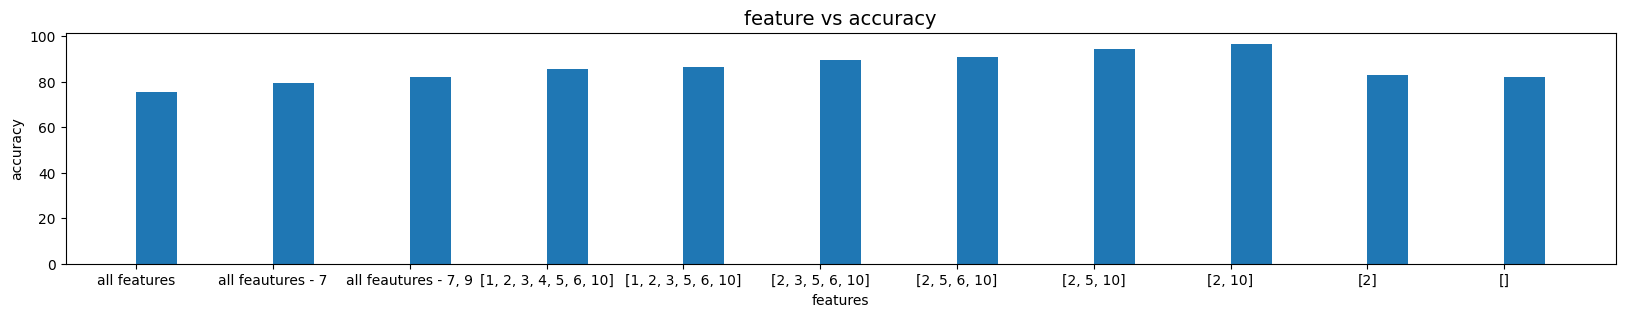

In [252]:
import matplotlib.pyplot as plt

x = []
for first in results:
    x.append(first[0])
    
x = [str(num) for num in x]
x[0] = "all features"
x[1] = "all feautures - 7"
x[2] = "all feautures - 7, 9"

y = []
for second in results:
    y.append(second[1])
    
plt.figure(figsize=(20, 3))
plt.bar(x, y, align='edge', width=0.3)
plt.title('feature vs accuracy', fontsize=14)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()

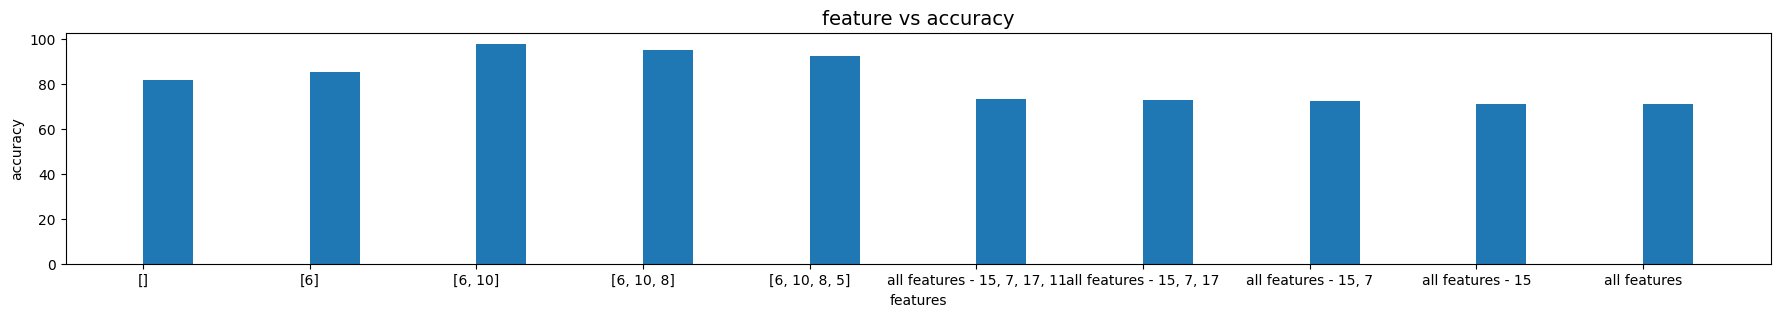

In [214]:
#results

x = []
for first in results:
    x.append(first[0])
    
x = [str(num) for num in x]

x[-1] = "all features"
x[-2] = "all features - 14"
x[-3] = "all features - 14, 3"
x[-4] = "all features - 14, 3, 10"

x = []
x.append(results[0][0])
x.append(results[1][0])
x.append(results[2][0])
x.append(results[3][0])
x.append(results[4][0])
x.append("all features - 15, 7, 17, 11")
x.append("all features - 15, 7, 17")
x.append("all features - 15, 7")
x.append("all features - 15")
x.append("all features")

x = [str(num) for num in x]

y = []
for second in results:
    y.append(second[1])
    
Y = [y[0], y[1], y[2], y[3], y[4], y[-5], y[-4], y[-3], y[-2], y[-1]]
    
plt.figure(figsize=(22, 3))
plt.bar(x, Y, align='edge', width=0.3)
plt.title('feature vs accuracy', fontsize=14)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()

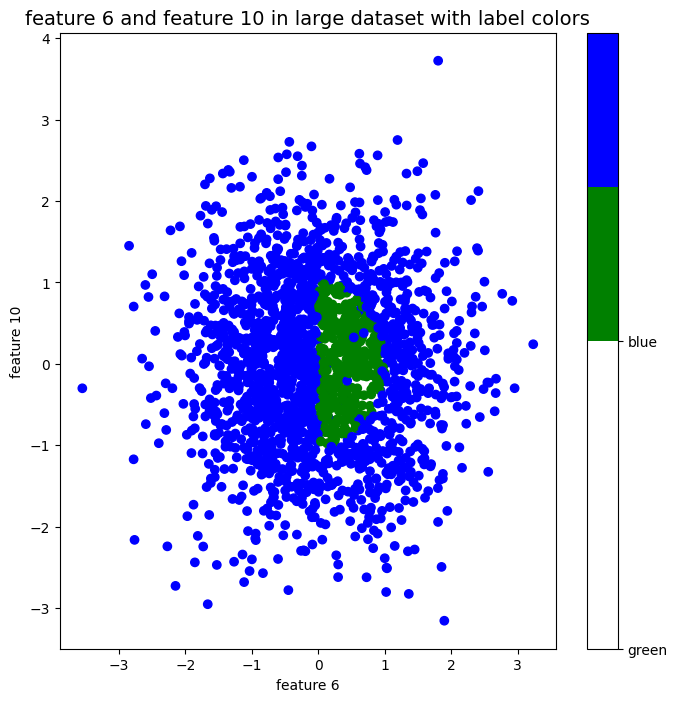

In [218]:
import matplotlib

labels = data[0]
x = data[[6]]
y =  data[[10]]
colors = ['green', 'blue']
fig =  plt.figure(figsize=(8,8))
plt.title('feature 6 and feature 10 in large dataset with label colors', fontsize=14)
plt.xlabel('feature 6')
plt.ylabel('feature 10')
plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [191]:
data.shape

(1000, 11)

In [196]:
labels = data[0]

In [197]:
labels

0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
995    2.0
996    2.0
997    2.0
998    1.0
999    1.0
Name: 0, Length: 1000, dtype: float64

In [209]:
x

[[],
 [6],
 [6, 10],
 [6, 10, 8],
 [6, 10, 8, 5],
 'all features - 15, 7, 17, 11',
 'all features - 15, 7, 17',
 'all features - 15, 7',
 'all features - 15',
 'all features']

In [210]:
Y

[81.7, 85.5, 98.05, 95.4, 92.65, 73.2, 72.95, 72.3, 71.1, 71.05]

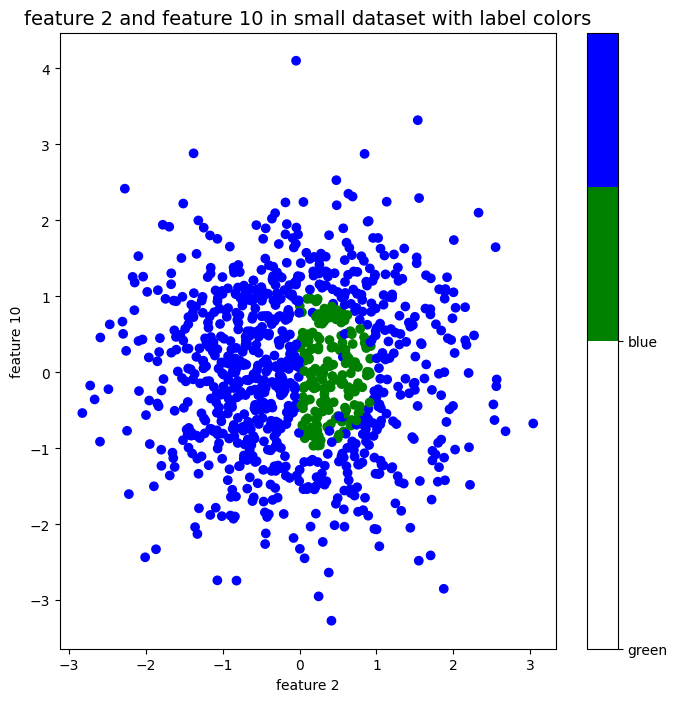

In [226]:
labels = data[0]
x = data[[2]]
y =  data[[10]]
colors = ['green', 'blue']
fig =  plt.figure(figsize=(8,8))
plt.title('feature 2 and feature 10 in small dataset with label colors', fontsize=14)
plt.xlabel('feature 2')
plt.ylabel('feature 10')
plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

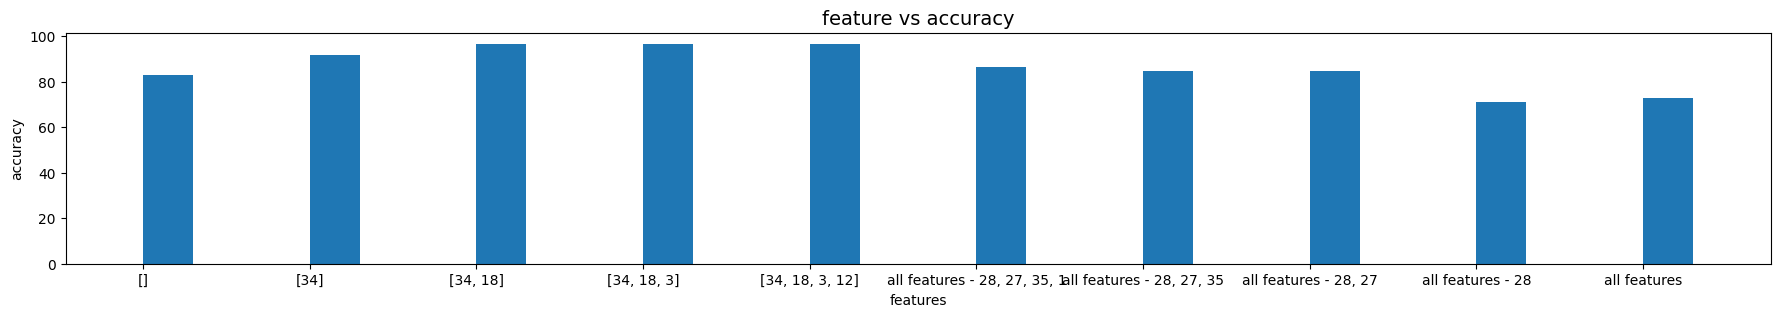

In [238]:
x = []
x.append(results[0][0])
x.append(results[1][0])
x.append(results[2][0])
x.append(results[3][0])
x.append(results[4][0])
x.append("all features - 28, 27, 35, 1")
x.append("all features - 28, 27, 35")
x.append("all features - 28, 27")
x.append("all features - 28")
x.append("all features")


x = [str(num) for num in x]

y = []
for second in results:
    y.append(second[1])
    
Y = [y[0], y[1], y[2], y[3], y[4], y[-5], y[-4], y[-3], y[-2], y[-1]]
    
plt.figure(figsize=(22, 3))
plt.bar(x, Y, align='edge', width=0.3)
plt.title('feature vs accuracy', fontsize=14)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()

In [237]:
results

[([], 83.05084745762711),
 ([34], 91.52542372881356),
 ([34, 18], 96.61016949152543),
 ([34, 18, 3], 96.61016949152543),
 ([34, 18, 3, 12], 96.61016949152543),
 ([34, 18, 3, 12, 15], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25, 26], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25, 26, 29], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25, 26, 29, 30], 96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25, 26, 29, 30, 31],
  96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25, 26, 29, 30, 31, 32],
  96.61016949152543),
 ([34, 18, 3, 12, 15, 19, 20, 21, 22, 24, 25, 26, 29, 30

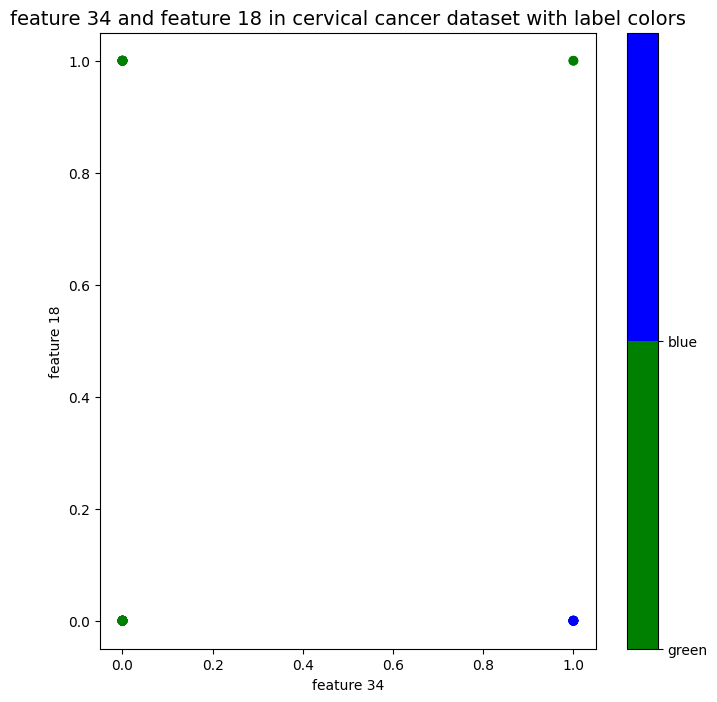

In [246]:
labels = data[0]
x = data[[34]]
y =  data[[18]]
colors = ['green', 'blue']
fig =  plt.figure(figsize=(8,8))
plt.title('feature 34 and feature 18 in cervical cancer dataset with label colors', fontsize=14)
plt.xlabel('feature 34')
plt.ylabel('feature 18')
plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [6]:
data = pd.read_csv('CS170_XXXlarge_Data__14.txt', sep="  ", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1.0,1.110212,-0.238071,-0.400269,0.094904,-1.614277,0.545857,0.254384,0.725334,0.527165,...,-0.137999,-0.260839,0.247499,-0.015832,-0.164593,-0.715124,1.217928,-0.532058,-0.611147,-0.694073
1,2.0,-1.060444,1.305208,1.755247,-0.585511,-1.419739,0.143592,0.941430,-0.330598,0.104481,...,1.309251,-1.042959,0.308055,-1.428802,0.205363,1.836137,-0.194868,1.078005,-0.552914,-0.206271
2,2.0,-0.084264,0.851725,0.146639,0.699636,0.947618,-0.075423,1.096528,-0.239687,-0.329877,...,0.317041,1.794735,0.980793,1.801175,-0.343194,-0.822708,-1.564421,1.279232,1.489028,-0.473435
3,1.0,-0.030160,-0.003311,-0.217716,-0.331190,0.727812,-1.029988,-0.025254,1.647551,-0.411423,...,-0.654664,-1.706547,-1.868856,1.585056,-0.403236,1.156475,0.083904,0.444944,2.832776,-1.557092
4,2.0,-1.776842,-0.827749,-1.296550,-0.676846,-1.327703,-1.178866,1.038560,-0.180361,1.140388,...,-0.923294,0.169855,1.127428,0.385631,-0.861430,0.836690,0.626277,-0.053151,0.949433,1.217344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.0,0.306196,-0.702160,0.013514,2.076029,-0.163735,0.651808,-0.892228,0.839663,-1.320509,...,-0.563348,-1.659474,-0.030771,0.238878,1.630387,-0.726929,-0.238040,-0.778399,-0.930734,0.940496
3996,1.0,0.261798,0.912289,-0.397598,1.579707,-0.522321,-0.457206,-0.029332,0.687487,-1.340708,...,-0.201628,1.018854,-1.222158,-0.266516,-1.904247,0.230834,0.892369,0.595941,-0.732771,-1.886861
3997,2.0,-1.320359,0.812545,1.609641,0.292224,-0.458175,-2.081894,-0.140546,0.033083,0.626439,...,-1.751426,-0.604786,0.324279,-2.886721,-1.081608,0.655175,-0.323862,-0.315009,-0.804024,-0.557353
3998,2.0,0.077804,0.980630,-0.377143,1.016935,-0.058571,-0.468137,0.358734,0.698027,0.651615,...,-0.256884,-0.804786,0.175753,0.346040,2.231163,-1.323753,-0.200422,-0.287266,-0.247919,-0.388365


In [258]:
st = time.time()
current_set = [x for x in range(1, data.shape[1])]
results = []
other = [0]
other.extend(current_set)
accuracy = cross_validation(data, other)
print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
print("\nBeginning Search.\n")
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80] accuracy is 68.8%
Running nearest neighbor with all 81 features, using leaving-one-out evaluation, I get an accuracy of 68.8%

Beginning Search.

392.75444293022156
is time taken


In [259]:
data = pd.read_csv('CS170_large_Data__22.txt', sep="  ", header=None)
data = np.array(data)

C:\Users\huntm\anaconda3\envs\alt\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [260]:
st = time.time()
current_set = [x for x in range(1, data.shape[1])]
results = []
other = [0]
other.extend(current_set)
accuracy = cross_validation(data, other)
print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
print("\nBeginning Search.\n")
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] accuracy is 71.05%
Running nearest neighbor with all 21 features, using leaving-one-out evaluation, I get an accuracy of 71.05%

Beginning Search.

100.20138454437256
is time taken


In [5]:
def cross_validation(data, other, check):
    
    part_data = data[:, other].copy()
    label = part_data[:, 0]
    label = np.squeeze(label)
    row = part_data[:, range(1, part_data.shape[1])]
    correct = 0
    incorrect = 0
        
    for i in range(len(part_data)):
        dat = row[i,:]
        lab = label[i]
        dist = np.inf
        for j in range(len(part_data)):
            if j == i:
                continue

            distance = np.sqrt(np.sum(np.square(np.subtract(dat, row[j,:]))))
            if (distance < dist):
                dist = distance
                nnl = label[j]

        if lab == nnl:
            correct = correct + 1
        else:
            incorrect = incorrect + 1
            if incorrect > check:
                print("Accuracy is lower than last so skipping calcs")
                return 0, -1
            
    accuracy = 100 * correct / len(data)
    other.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(other, accuracy))
    return accuracy, incorrect

def forwards(data):
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy, un  = cross_validation(data, other, 10000)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")
    
    current_set = []
    best_acc = 0
     
    accuracy, un = cross_validation(data, [0], 10000)
    results.append(([], accuracy))       

    for i in range(1, data.shape[1]):
        add = 0
        best = 0
        check = 10000
        for j in range(1, data.shape[1]):
            if j in current_set:
                continue

            other = [0]
            other.extend(current_set)
            other.append(j)
    
            accuracy, inc = cross_validation(data, other, check)
            if (inc == -1):
                continue
            check = inc
        
            if (accuracy > best):
                best = accuracy
                add = j
            
        current_set.append(add)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acc:
            res = pair
            best_acc = best
        
    return res, results


def backwards(data):    
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")

    results.append(([y + 1 for y in range(data.shape[1]-1)], accuracy))
    best_acu = 0
    
    for i in reversed(range(1, data.shape[1])):
        best = 0
        sub = 0
        for j in range(1, data.shape[1]):
            if j not in current_set:
                continue
                
            other = [0]
            other.extend(current_set)
            other.remove(j)
            accuracy = cross_validation(data, other)

            if accuracy > best:
                best = accuracy
                sub = j

        current_set.remove(sub)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acu:
            res = pair
            best_acu = best
    
    return res, results

st = time.time()
#res, results = backwards(data)
res, results = forwards(data)
print("Finished search!! The best feature subset is {}, which has an accuracy of {}%".format(res[0], res[1]))
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] accuracy is 75.4%
Running nearest neighbor with all 11 features, using leaving-one-out evaluation, I get an accuracy of 75.4%

Beginning Search.

Using feature(s) [] accuracy is 82.1%
Using feature(s) [1] accuracy is 71.6%
Using feature(s) [2] accuracy is 82.8%
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs

Feature set [2] was best, accuracy is 82.8%

Using feature(s) [2, 1] accuracy is 83.8%
Accuracy is lower than last so skipping calcs
Accuracy is lower than last so skipping calcs
Using feature(s) [2, 5] accuracy is 84.1%
Using feature(s) [2, 6] accuracy is 84.2%
Using feature(s) [2, 7] accuracy is 86.1%
Accuracy is low

In [2]:
import time
import pandas as pd
import numpy as np

In [9]:
st = time.time()
accuracy, un = cross_validation(data, [0], 10000)
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [] accuracy is 18.4%
150.67649745941162
is time taken


In [8]:
data = np.array(data)

In [13]:
np.count_nonzero(data[:,0] == 1)

737

In [14]:
len(data[:, 0])

4000

In [18]:
new_data = []

for i in range(len(data)):
    if data[i, 0] == 1:
        new_data.append(data[i])
        
new_data

[array([ 1.        ,  1.1102122 , -0.238071  , -0.40026946,  0.09490352,
        -1.614277  ,  0.54585663,  0.25438447,  0.72533394,  0.5271647 ,
        -1.1977929 ,  0.63419728,  1.2563646 , -1.4445888 ,  0.57007137,
         0.209089  ,  0.52974113, -0.65261022, -0.63715145,  1.9487678 ,
         0.15655955,  1.4646399 , -0.32353736,  0.17881319, -0.91997147,
         1.0382158 ,  2.2672318 ,  0.16811672,  0.34211421, -1.1083258 ,
         0.56580361, -0.44461813, -0.2371253 , -0.31303892,  0.39521889,
         0.04363779, -0.48590076,  0.98203254,  0.88154811,  0.08398617,
        -0.25646004, -1.2182286 ,  1.8650689 ,  0.87756368, -0.19065431,
         0.00834384,  0.62378222,  0.97751112,  1.4762564 ,  1.9394732 ,
        -0.55518259,  0.70014664,  0.54786905,  0.42449493,  1.0134164 ,
         0.24395656, -0.03751564,  0.11148574,  0.24149743,  0.83766618,
         0.30741235, -1.0802182 ,  1.5567537 ,  1.0096741 , -0.11127543,
        -0.08493565, -1.6866384 ,  0.50016937,  0.0

In [30]:
added_amount = 1263
repeat = []
print(len(new_data))
while added_amount > 0:
    r = np.random.uniform(0, data.shape[0])
    r = int(r)
    if data[r, 0] == 2 and r not in repeat:
        new_data.append(data[r])
        added_amount = added_amount - 1
        repeat.append(r)
        
len(new_data)

737


2000

In [21]:
2000-737

1263

In [38]:
data = np.array(data)

In [35]:
r = np.random.permutation(new_data.shape[0])
new_data = new_data[r]
new_data[:, 0]

array([2., 2., 1., ..., 2., 2., 1.])

In [40]:
def cross_validation(data, other):
    
    part_data = data[:, other].copy()
    label = part_data[:, 0]
    label = np.squeeze(label)
    row = part_data[:, range(1, part_data.shape[1])]
    correct = 0
        
    for i in range(len(part_data)):
        dat = row[i,:]
        lab = label[i]
        dist = np.inf
        for j in range(len(part_data)):
            if j == i:
                continue

            distance = np.sqrt(np.sum(np.square(np.subtract(dat, row[j,:]))))
            if (distance < dist):
                dist = distance
                nnl = label[j]

        if lab == nnl:
            correct = correct + 1
            
    accuracy = 100 * correct / len(data)
    other.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(other, accuracy))
    return accuracy

def forwards(data, big):
    counter = 0
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")
    
    current_set = []
    best_acc = 0
     
    accuracy = cross_validation(data, [0])
    results.append(([], accuracy))       

    for i in range(1, data.shape[1]):
        add = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j in current_set:
                continue

            other = [0]
            other.extend(current_set)
            other.append(j)
    
            accuracy = cross_validation(data, other)
        
            if (accuracy > best):
                best = accuracy
                add = j
            
        current_set.append(add)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
            counter = counter + 1
            if big and counter >= 2:
                print("Stopping early since accuracy decreased twice.")
                return res, results
            
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acc:
            res = pair
            best_acc = best
        
    return res, results


def backwards(data):    
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")

    results.append(([y + 1 for y in range(data.shape[1]-1)], accuracy))
    best_acu = 0
    
    for i in reversed(range(1, data.shape[1])):
        best = 0
        sub = 0
        for j in range(1, data.shape[1]):
            if j not in current_set:
                continue
                
            other = [0]
            other.extend(current_set)
            other.remove(j)
            accuracy = cross_validation(data, other)

            if accuracy > best:
                best = accuracy
                sub = j

        current_set.remove(sub)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acu:
            res = pair
            best_acu = best
    
    return res, results

st = time.time()
#res, results = backwards(data)
big = True
res, results = forwards(new_data, big)
print("Finished search!! The best feature subset is {}, which has an accuracy of {}%".format(res[0], res[1]))
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80] accuracy is 54.5%
Running nearest neighbor with all 81 features, using leaving-one-out evaluation, I get an accuracy of 54.5%

Beginning Search.

Using feature(s) [] accuracy is 63.15%
Using feature(s) [1] accuracy is 53.3%
Using feature(s) [2] accuracy is 51.45%
Using feature(s) [3] accuracy is 54.95%
Using feature(s) [4] accuracy is 54.35%
Using feature(s) [5] accuracy is 53.95%
Using feature(s) [6] accuracy is 55.35%
Using feature(s) [7] accuracy is 52.4%
Using feature(s) [8] accuracy is 52.85%
Using feature(s) [9] accuracy is 52.5%
Using feature(s) [10] accuracy is 56.25%
Using feature(s) [11] accuracy is 51.1%
Using feature(s) [12] accuracy is 53.5%
Using fe

Using feature(s) [60, 35, 19] accuracy is 93.75%
Using feature(s) [60, 35, 20] accuracy is 93.55%
Using feature(s) [60, 35, 21] accuracy is 94.0%
Using feature(s) [60, 35, 22] accuracy is 93.9%
Using feature(s) [60, 35, 23] accuracy is 93.7%
Using feature(s) [60, 35, 24] accuracy is 93.8%
Using feature(s) [60, 35, 25] accuracy is 94.35%
Using feature(s) [60, 35, 26] accuracy is 93.7%
Using feature(s) [60, 35, 27] accuracy is 93.7%
Using feature(s) [60, 35, 28] accuracy is 93.45%
Using feature(s) [60, 35, 29] accuracy is 94.4%
Using feature(s) [60, 35, 30] accuracy is 93.1%
Using feature(s) [60, 35, 31] accuracy is 94.05%
Using feature(s) [60, 35, 32] accuracy is 93.55%
Using feature(s) [60, 35, 33] accuracy is 94.15%
Using feature(s) [60, 35, 34] accuracy is 93.4%
Using feature(s) [60, 35, 36] accuracy is 93.45%
Using feature(s) [60, 35, 37] accuracy is 93.8%
Using feature(s) [60, 35, 38] accuracy is 94.0%
Using feature(s) [60, 35, 39] accuracy is 93.6%
Using feature(s) [60, 35, 40] ac

In [41]:
data = pd.read_csv('CS170_XXXlarge_Data__14.txt', sep="  ", header=None)
data

C:\Users\huntm\anaconda3\envs\alt\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1.0,1.110212,-0.238071,-0.400269,0.094904,-1.614277,0.545857,0.254384,0.725334,0.527165,...,-0.137999,-0.260839,0.247499,-0.015832,-0.164593,-0.715124,1.217928,-0.532058,-0.611147,-0.694073
1,2.0,-1.060444,1.305208,1.755247,-0.585511,-1.419739,0.143592,0.941430,-0.330598,0.104481,...,1.309251,-1.042959,0.308055,-1.428802,0.205363,1.836137,-0.194868,1.078005,-0.552914,-0.206271
2,2.0,-0.084264,0.851725,0.146639,0.699636,0.947618,-0.075423,1.096528,-0.239687,-0.329877,...,0.317041,1.794735,0.980793,1.801175,-0.343194,-0.822708,-1.564421,1.279232,1.489028,-0.473435
3,1.0,-0.030160,-0.003311,-0.217716,-0.331190,0.727812,-1.029988,-0.025254,1.647551,-0.411423,...,-0.654664,-1.706547,-1.868856,1.585056,-0.403236,1.156475,0.083904,0.444944,2.832776,-1.557092
4,2.0,-1.776842,-0.827749,-1.296550,-0.676846,-1.327703,-1.178866,1.038560,-0.180361,1.140388,...,-0.923294,0.169855,1.127428,0.385631,-0.861430,0.836690,0.626277,-0.053151,0.949433,1.217344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.0,0.306196,-0.702160,0.013514,2.076029,-0.163735,0.651808,-0.892228,0.839663,-1.320509,...,-0.563348,-1.659474,-0.030771,0.238878,1.630387,-0.726929,-0.238040,-0.778399,-0.930734,0.940496
3996,1.0,0.261798,0.912289,-0.397598,1.579707,-0.522321,-0.457206,-0.029332,0.687487,-1.340708,...,-0.201628,1.018854,-1.222158,-0.266516,-1.904247,0.230834,0.892369,0.595941,-0.732771,-1.886861
3997,2.0,-1.320359,0.812545,1.609641,0.292224,-0.458175,-2.081894,-0.140546,0.033083,0.626439,...,-1.751426,-0.604786,0.324279,-2.886721,-1.081608,0.655175,-0.323862,-0.315009,-0.804024,-0.557353
3998,2.0,0.077804,0.980630,-0.377143,1.016935,-0.058571,-0.468137,0.358734,0.698027,0.651615,...,-0.256884,-0.804786,0.175753,0.346040,2.231163,-1.323753,-0.200422,-0.287266,-0.247919,-0.388365


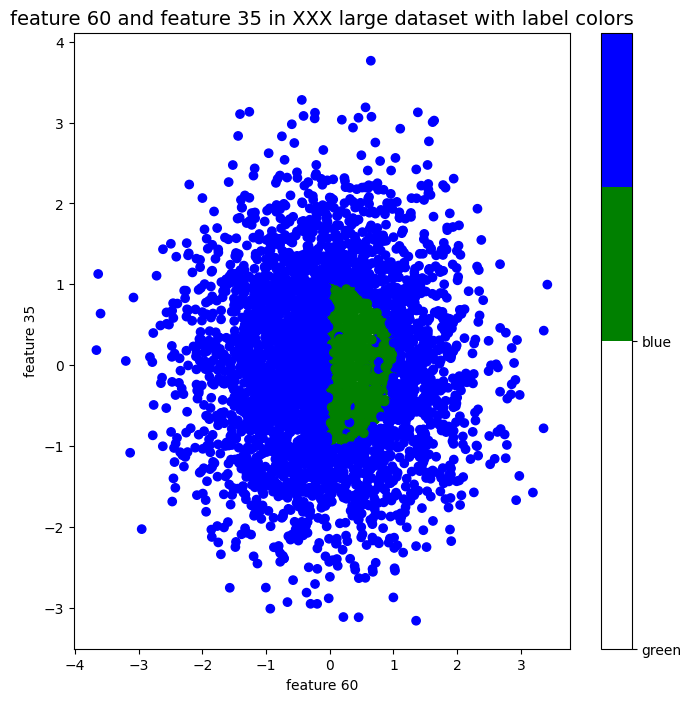

In [45]:
import matplotlib.pyplot as plt
import matplotlib

labels = data[0]
x = data[[60]]
y =  data[[35]]
colors = ['green', 'blue']
fig =  plt.figure(figsize=(8,8))
plt.title('feature 60 and feature 35 in XXX large dataset with label colors', fontsize=14)
plt.xlabel('feature 60')
plt.ylabel('feature 35')
plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [46]:
results

[([], 63.15), ([60], 82.1), ([60, 35], 96.6), ([60, 35, 41], 95.75)]

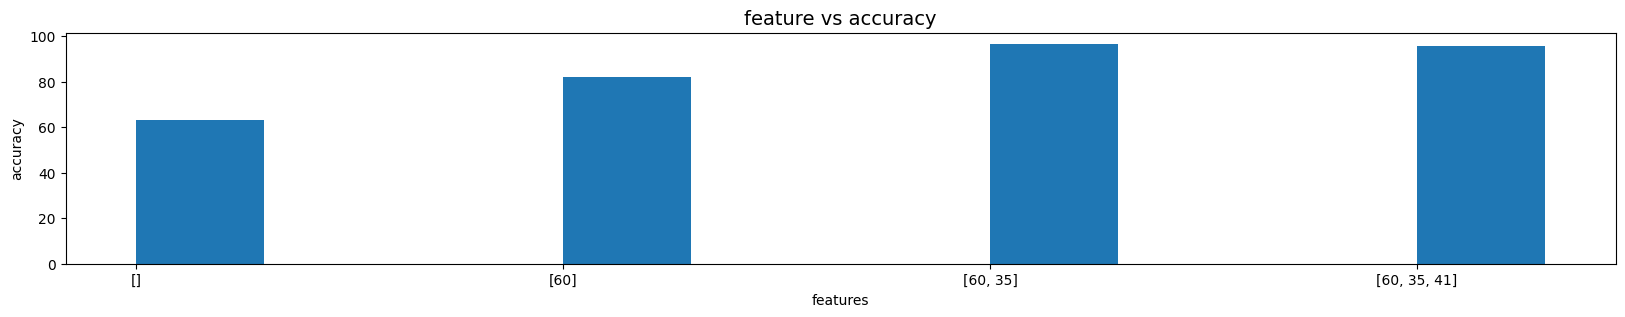

In [47]:
x = []
for first in results:
    x.append(first[0])
    
x = [str(num) for num in x]

y = []
for second in results:
    y.append(second[1])
    
plt.figure(figsize=(20, 3))
plt.bar(x, y, align='edge', width=0.3)
plt.title('feature vs accuracy', fontsize=14)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()

In [3]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
print(data)
print(data.columns.values)
data.rename(columns={'Age':1, 'Number of sexual partners':2, 'First sexual intercourse':3,
 'Num of pregnancies':4, 'Smokes':5, 'Smokes (years)':6, 'Smokes (packs/year)':7,
 'Hormonal Contraceptives':8, 'Hormonal Contraceptives (years)':9, 'IUD':10,
 'IUD (years)':11, 'STDs':12, 'STDs (number)':13, 'STDs:condylomatosis':14,
 'STDs:cervical condylomatosis':15, 'STDs:vaginal condylomatosis':16,
 'STDs:vulvo-perineal condylomatosis':17, 'STDs:syphilis':18,
 'STDs:pelvic inflammatory disease':19, 'STDs:genital herpes':20,
 'STDs:molluscum contagiosum':21, 'STDs:AIDS':22, 'STDs:HIV':23, 'STDs:Hepatitis B':24,
 'STDs:HPV':25, 'STDs: Number of diagnosis':26, 'STDs: Time since first diagnosis':27,
 'STDs: Time since last diagnosis':28, 'Dx:Cancer':29, 'Dx:CIN':30, 'Dx:HPV':31, 'Dx':32,
 'Hinselmann':33, 'Schiller':34, 'Citology':35, 'Biopsy':0},inplace=True)
print(data.head)
change = []
for i in range(36):
    print(data[i].dtype)
for i in range(36):
    #print(data[i].dtype)
    if str(data[i].dtype) == 'object':
        change.append(True)
    else:
        change.append(False)
        
print(change)
for i, val in enumerate(change):
    if val:
        data.drop(data[(data[i] == '?')].index, inplace=True)

for i, val in enumerate(change):
    if val:
        pd.to_numeric(data[i])

data[np.arange(0, 36)] = data[np.arange(0, 36)].astype(float)

for i in range(36):
    print(data[i].dtype)

data = data[np.arange(0,36)]
data = np.array(data)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [52]:
data

array([[ 0., 41.,  3., ...,  0.,  0.,  0.],
       [ 1., 40.,  1., ...,  0.,  1.,  1.],
       [ 0., 35.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0., 36.,  3., ...,  0.,  0.,  0.],
       [ 0., 33.,  4., ...,  0.,  0.,  0.],
       [ 0., 40.,  3., ...,  0.,  0.,  0.]])

In [55]:
data = pd.read_csv('CS170_XXXlarge_Data__14.txt', sep="  ", header=None)
data = np.array(data)
new_data = []

for i in range(len(data)):
    if data[i, 0] == 1:
        new_data.append(data[i])

added_amount = 1263
repeat = []
print(len(new_data))
while added_amount > 0:
    r = np.random.uniform(0, data.shape[0])
    r = int(r)
    if data[r, 0] == 2 and r not in repeat:
        new_data.append(data[r])
        added_amount = added_amount - 1
        repeat.append(r)

new_data = np.array(new_data)
r = np.random.permutation(new_data.shape[0])
new_data = new_data[r]

737


In [57]:
new_data.shape

(2000, 81)

In [3]:
results

[([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  71.05),
 ([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 72.2),
 ([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20], 73.1),
 ([1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20], 73.3),
 ([1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20], 73.35),
 ([1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19, 20], 74.1),
 ([1, 3, 4, 5, 6, 7, 8, 10, 12, 15, 16, 17, 19, 20], 75.25),
 ([1, 3, 4, 6, 7, 8, 10, 12, 15, 16, 17, 19, 20], 76.5),
 ([1, 3, 4, 6, 7, 8, 10, 12, 16, 17, 19, 20], 78.15),
 ([1, 3, 4, 6, 7, 8, 10, 12, 16, 17, 19], 78.2),
 ([1, 3, 4, 6, 8, 10, 12, 16, 17, 19], 78.75),
 ([3, 4, 6, 8, 10, 12, 16, 17, 19], 80.85),
 ([3, 4, 6, 8, 10, 12, 16, 17], 81.5),
 ([3, 4, 6, 8, 10, 12, 16], 84.4),
 ([4, 6, 8, 10, 12, 16], 87.75),
 ([4, 6, 8, 10, 12], 89.8),
 ([4, 6, 8, 10], 92.6),
 ([6, 8, 10], 95.4),
 ([6, 10], 98.05),
 ([6], 85.5),
 ([], 81.7)]

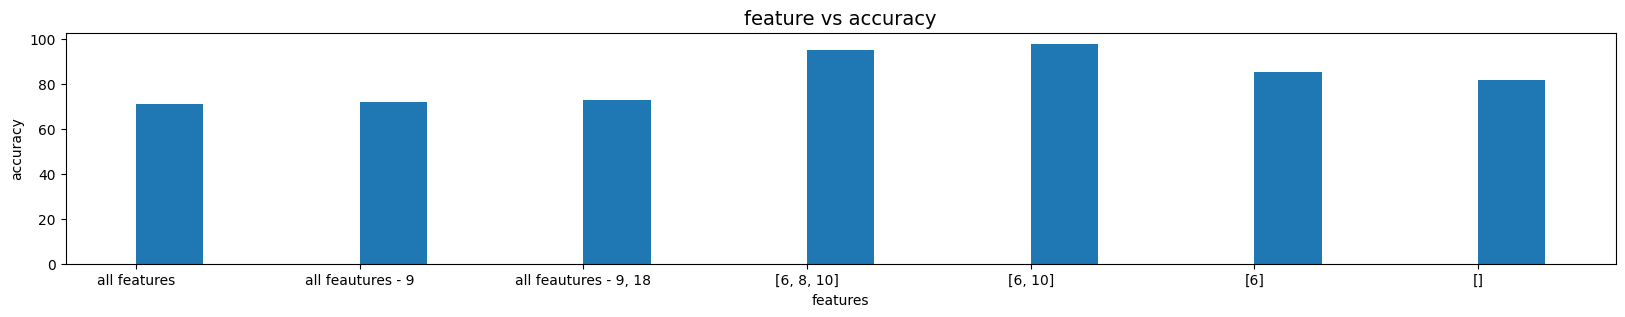

In [6]:
import matplotlib.pyplot as plt

x = []
for first in results:
    x.append(first[0])
    
x = [str(num) for num in x]
x[0] = "all features"
x[1] = "all feautures - 9"
x[2] = "all feautures - 9, 18"

x = [x[0], x[1], x[2], x[-4], x[-3], x[-2], x[-1]]

y = []
for second in results:
    y.append(second[1])
    
y = [y[0], y[1], y[2], y[-4], y[-3], y[-2], y[-1]]
    
plt.figure(figsize=(20, 3))
plt.bar(x, y, align='edge', width=0.3)
plt.title('feature vs accuracy', fontsize=14)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()

In [6]:
import pandas as pd
import numpy as np
import time

def cross_validation(data, other):
    
    part_data = data[:, other].copy()
    label = part_data[:, 0]
    label = np.squeeze(label)
    row = part_data[:, range(1, part_data.shape[1])]
    correct = 0
        
    for i in range(len(part_data)):
        dat = row[i,:]
        lab = label[i]
        dist = np.inf
        for j in range(len(part_data)):
            if j == i:
                continue

            distance = np.sqrt(np.sum(np.square(np.subtract(dat, row[j,:]))))
            if (distance < dist):
                dist = distance
                nnl = label[j]

        if lab == nnl:
            correct = correct + 1
            
    accuracy = 100 * correct / len(data)
    other.remove(0)
    print("Using feature(s) {} accuracy is {}%".format(other, accuracy))
    return accuracy

def forwards(data):
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")
    
    current_set = []
    best_acc = 0
     
    accuracy = cross_validation(data, [0])
    results.append(([], accuracy))       

    for i in range(1, data.shape[1]):
        add = 0
        best = 0
        for j in range(1, data.shape[1]):
            if j in current_set:
                continue

            other = [0]
            other.extend(current_set)
            other.append(j)
    
            accuracy = cross_validation(data, other)
        
            if (accuracy > best):
                best = accuracy
                add = j
            
        current_set.append(add)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acc:
            res = pair
            best_acc = best
        
    return res, results


def backwards(data):    
    current_set = [x for x in range(1, data.shape[1])]
    results = []
    other = [0]
    other.extend(current_set)
    accuracy = cross_validation(data, other)
    print("Running nearest neighbor with all {} features, using leaving-one-out evaluation, I get an accuracy of {}%".format(data.shape[1], accuracy))
    print("\nBeginning Search.\n")

    results.append(([y + 1 for y in range(data.shape[1]-1)], accuracy))
    best_acu = 0
    
    for i in reversed(range(1, data.shape[1])):
        best = 0
        sub = 0
        for j in range(1, data.shape[1]):
            if j not in current_set:
                continue
                
            other = [0]
            other.extend(current_set)
            other.remove(j)
            accuracy = cross_validation(data, other)

            if accuracy > best:
                best = accuracy
                sub = j

        current_set.remove(sub)
        if len(results) != 0 and results[-1][1] > best:
            print("\n(Warning, Accuracy has decreased! Continuing search in case of local maxima)")
        print("\nFeature set {} was best, accuracy is {}%\n".format(current_set, best))
        pair = ([x for x in current_set], best)
        results.append(pair)
        if best > best_acu:
            res = pair
            best_acu = best
    
    return res, results

st = time.time()
res, results = backwards(data)
#res, results = forwards(data)
print("Finished search!! The best feature subset is {}, which has an accuracy of {}%".format(res[0], res[1]))
ed = time.time()
print(ed - st)
print("is time taken")

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 72.88135593220339%
Running nearest neighbor with all 36 features, using leaving-one-out evaluation, I get an accuracy of 72.88135593220339%

Beginning Search.

Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 76.27118644067797%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 71.1864406779661%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 76.27118644067797%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] acc

Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 77.96610169491525%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 77.96610169491525%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 77.96610169491525%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34] accuracy is 79.66

Using feature(s) [1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 5

Using feature(s) [1, 2, 3, 6, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 72.88135593220339%
Using feature(s) [1, 2, 3, 6, 7, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 13, 14, 15, 16, 17, 19, 20, 21, 2

Using feature(s) [1, 2, 3, 6, 7, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 71.1864406779661%
Using feature(s) [1, 2, 3, 6, 7, 9, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] ac

Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 

Using feature(s) [2, 3, 6, 7, 9, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 69.49152542372882%
Using feature(s) [1, 3, 6, 7, 9, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 6, 7, 9, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 69.49152542372882%
Using feature(s) [1, 2, 3, 7, 9, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 74.57627118644068%
Using feature(s) [1, 2, 3, 6, 9, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 72.88135593220339%
Using feature(s) [1, 2, 3, 6, 7, 9, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy 

Using feature(s) [1, 3, 6, 7, 9, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 6, 7, 9, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 69.49152542372882%
Using feature(s) [1, 2, 3, 7, 9, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 74.57627118644068%
Using feature(s) [1, 2, 3, 6, 9, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 71.1864406779661%
Using feature(s) [1, 2, 3, 6, 7, 9, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 24, 25, 27, 28, 29, 30, 31, 32, 33, 

Using feature(s) [1, 2, 6, 7, 9, 18, 27, 28, 30, 31, 32, 33, 34, 35] accuracy is 69.49152542372882%
Using feature(s) [1, 2, 3, 7, 9, 18, 27, 28, 30, 31, 32, 33, 34, 35] accuracy is 74.57627118644068%
Using feature(s) [1, 2, 3, 6, 9, 18, 27, 28, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 18, 27, 28, 30, 31, 32, 33, 34, 35] accuracy is 71.1864406779661%
Using feature(s) [1, 2, 3, 6, 7, 9, 27, 28, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 28, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 27, 30, 31, 32, 33, 34, 35] accuracy is 79.66101694915254%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 27, 28, 31, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 27, 28, 30, 32, 33, 34, 35] accuracy is 81.35593220338983%
Using feature(s) [1, 2, 3, 6, 7, 9, 18, 27, 28, 30, 31, 33, 34, 35] accuracy is 81.35593220338983%
Using f

Using feature(s) [1, 3, 6, 7, 27, 28, 34] accuracy is 69.49152542372882%
Using feature(s) [1, 3, 6, 7, 9, 28, 34] accuracy is 77.96610169491525%
Using feature(s) [1, 3, 6, 7, 9, 27, 34] accuracy is 77.96610169491525%
Using feature(s) [1, 3, 6, 7, 9, 27, 28] accuracy is 74.57627118644068%

Feature set [1, 3, 6, 7, 9, 28, 34] was best, accuracy is 77.96610169491525%

Using feature(s) [3, 6, 7, 9, 28, 34] accuracy is 74.57627118644068%
Using feature(s) [1, 6, 7, 9, 28, 34] accuracy is 71.1864406779661%
Using feature(s) [1, 3, 7, 9, 28, 34] accuracy is 74.57627118644068%
Using feature(s) [1, 3, 6, 9, 28, 34] accuracy is 74.57627118644068%
Using feature(s) [1, 3, 6, 7, 28, 34] accuracy is 72.88135593220339%
Using feature(s) [1, 3, 6, 7, 9, 34] accuracy is 88.13559322033899%
Using feature(s) [1, 3, 6, 7, 9, 28] accuracy is 77.96610169491525%

Feature set [1, 3, 6, 7, 9, 34] was best, accuracy is 88.13559322033899%

Using feature(s) [3, 6, 7, 9, 34] accuracy is 91.52542372881356%
Using featur

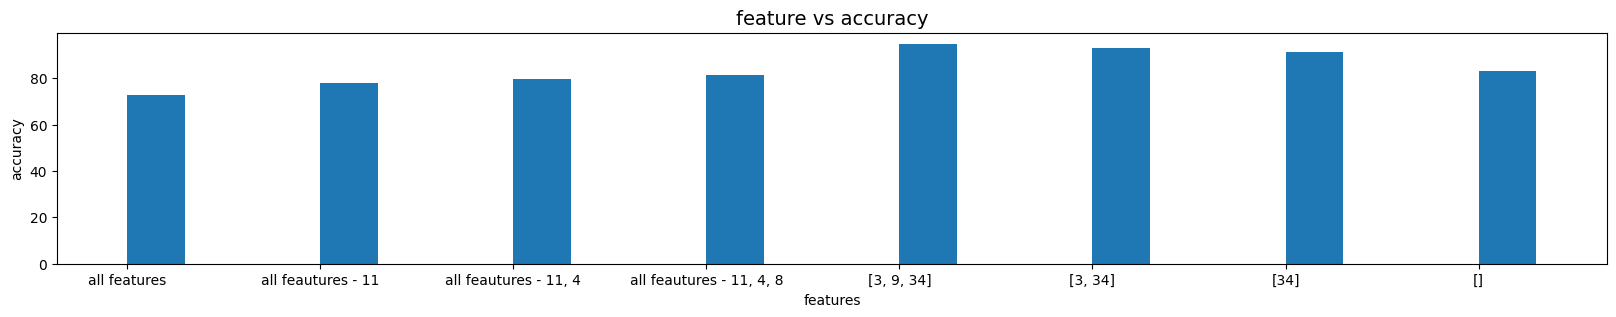

In [7]:
import matplotlib.pyplot as plt

x = []
for first in results:
    x.append(first[0])
    
x = [str(num) for num in x]
x[0] = "all features"
x[1] = "all feautures - 11"
x[2] = "all feautures - 11, 4"
x[3] = "all feautures - 11, 4, 8"

x = [x[0], x[1], x[2], x[3], x[-4], x[-3], x[-2], x[-1]]

y = []
for second in results:
    y.append(second[1])
    
y = [y[0], y[1], y[2], y[3], y[-4], y[-3], y[-2], y[-1]]
    
plt.figure(figsize=(20, 3))
plt.bar(x, y, align='edge', width=0.3)
plt.title('feature vs accuracy', fontsize=14)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()

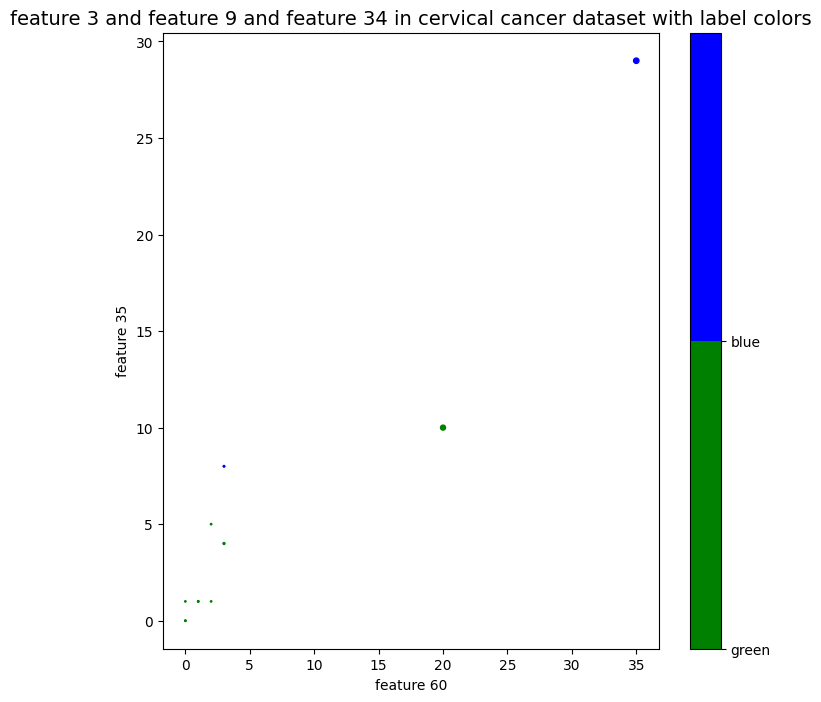

In [9]:
import matplotlib.pyplot as plt
import matplotlib

labels = data[0]
x = data[[3]]
y =  data[[9]]
z = data[[34]]
colors = ['green', 'blue', 'red']
fig =  plt.figure(figsize=(8,8))
plt.title('feature 3 and feature 9 and feature 34 in cervical cancer dataset with label colors', fontsize=14)
plt.xlabel('feature 60')
plt.ylabel('feature 35')
plt.scatter(x, y, z, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0, max(labels), max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

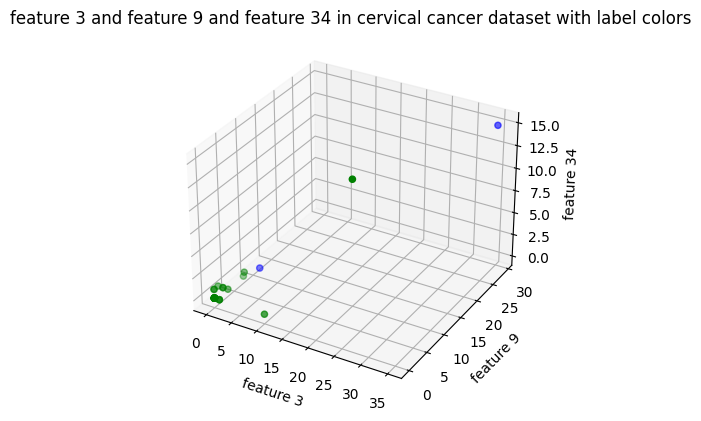

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

'''
n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)
'''
labels = data[0]
x = data[[3]]
y =  data[[9]]
z = data[[34]]
colors = ['green', 'blue']
ax.scatter(x, y, z, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('feature 3')
ax.set_ylabel('feature 9')
ax.set_zlabel('feature 34')
ax.set_title('feature 3 and feature 9 and feature 34 in cervical cancer dataset with label colors')

plt.show()